<a href="https://colab.research.google.com/github/HLaw18/4105/blob/main/HW3_4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


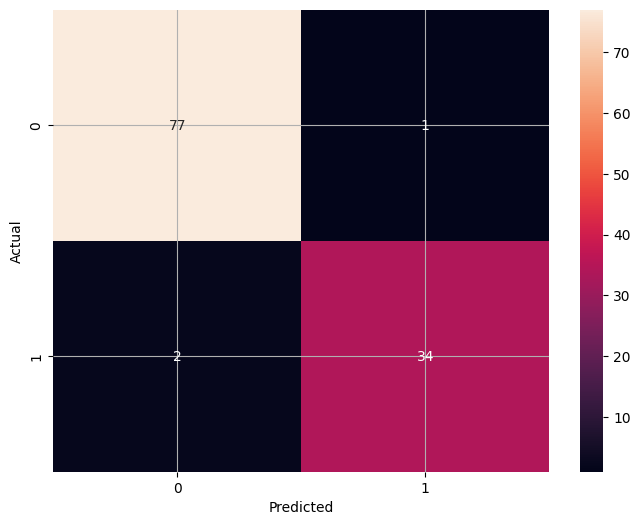

Accuracy = 0.7922077922077922
Precision = 0.7692307692307693
Recall = 0.5660377358490566
F1 Score = 0.6521739130434783


In [ ]:
#problem 1
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/diabetes.csv'
diabetesData = pd.DataFrame(pd.read_csv(file_path))

varlist=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

y=diabetesData[varlist]
yDia=y.pop('Outcome')
XDia=y

X_trainDia, X_testDia, y_trainDia, y_testDia = train_test_split(XDia, yDia, train_size = 0.8, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_trainDia = scaler.fit_transform(X_trainDia)
X_testDia = scaler.transform(X_testDia)

lr_model = LogisticRegression()
lr_model.fit(X_trainDia, y_trainDia)

y_predDia = lr_model.predict(X_testDia)

accuracy = accuracy_score(y_testDia, y_predDia)
precision = precision_score(y_testDia, y_predDia)
recall = recall_score(y_testDia, y_predDia)
f1 = f1_score(y_testDia, y_predDia)

conf_matrix = confusion_matrix(y_testDia, y_predDia)

conf_matrix1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid()
plt.show()

print('Accuracy =',accuracy)
print('Precision =',precision)
print('Recall =', recall)
print('F1 Score =', f1)

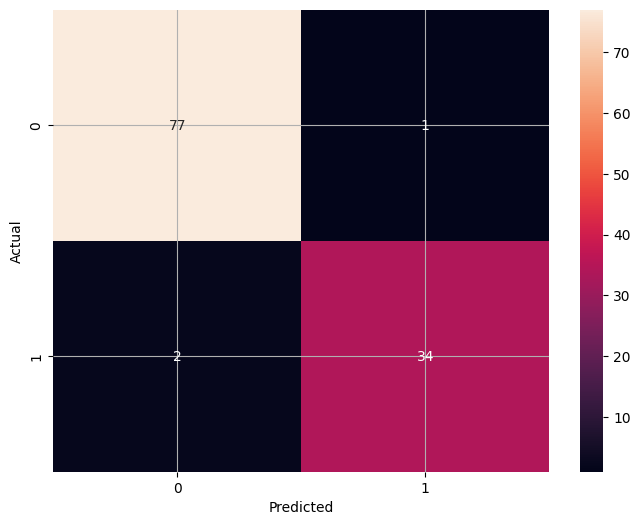

Accuracy = 0.9736842105263158
Precision = 0.9746835443037974
Recall = 0.9871794871794872
F1 Score = 0.980891719745223


In [ ]:
# Problem 2a
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
cancerData = pd.read_csv(file_path)

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = cancerData[feature_cols]
y = cancerData[target_col]

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')

conf_matrix2a = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2a, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid()
plt.show()

print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

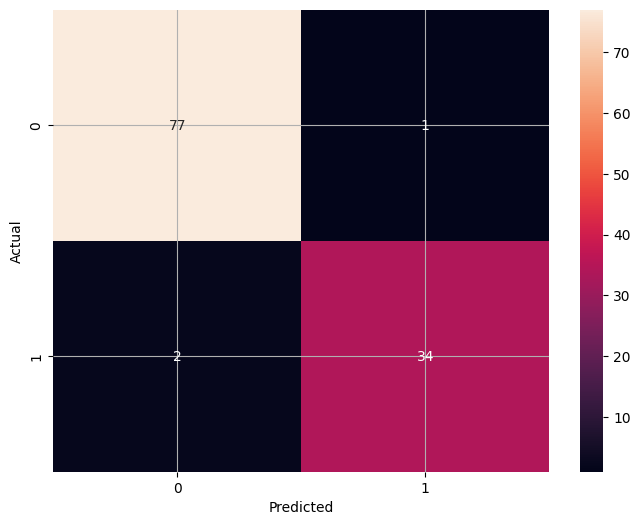

Accuracy = 0.9736842105263158
Precision = 0.9746835443037974
Recall = 0.9871794871794872
F1 Score = 0.980891719745223


In [ ]:
#problem 2b
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
cancerData = pd.read_csv(file_path)

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = cancerData[feature_cols]
y = cancerData[target_col]

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model_regularized = LogisticRegression(penalty='l2')
lr_model_regularized.fit(X_train_scaled, y_train)

y_pred_regularized = lr_model_regularized.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')

conf_matrix2b = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2b, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid()
plt.show()

print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

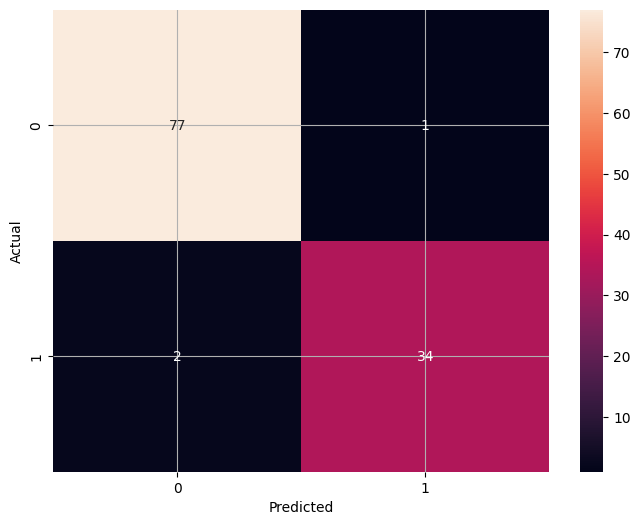

Accuracy = 0.9736842105263158
Precision = 0.9746835443037974
Recall = 0.9871794871794872
F1 Score = 0.980891719745223


In [ ]:
#problem 3
from sklearn.naive_bayes import GaussianNB
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
cancerData = pd.read_csv(file_path)

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = cancerData[feature_cols]
y = cancerData[target_col]

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='B')
recall = recall_score(y_test, y_pred, pos_label='B')
f1 = f1_score(y_test, y_pred, pos_label='B')

conf_matrix3 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid()
plt.show()

print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

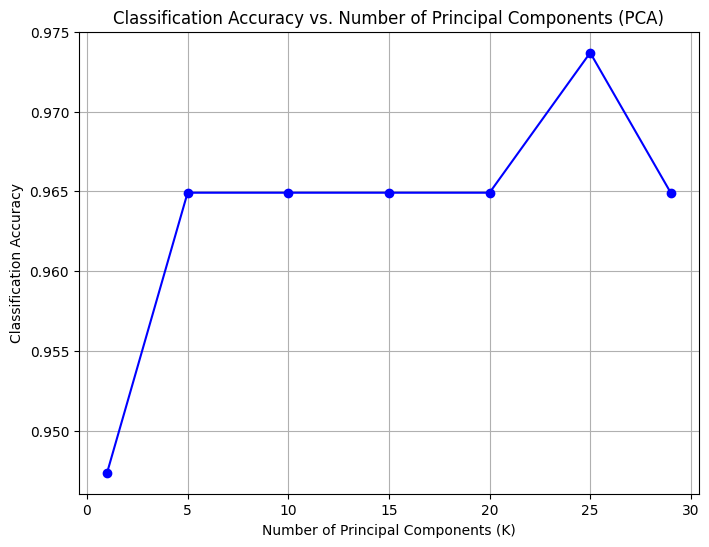

Accuracy = 0.9649122807017544
Precision = 0.9746835443037974
Recall = 0.9871794871794872
F1 Score = 0.980891719745223


In [ ]:
#problem 4
from sklearn.decomposition import PCA
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
cancerData = pd.read_csv(file_path)

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = cancerData[feature_cols]
y = cancerData[target_col]

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 5, 10, 15, 20, 25, 29]
accuracy_values = []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    lr_model_pca = LogisticRegression()
    lr_model_pca.fit(X_train_pca, y_train)

    y_pred_pca = lr_model_pca.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred_pca)
    accuracy_values.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title("Classification Accuracy vs. Number of Principal Components (PCA)")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.show()

print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

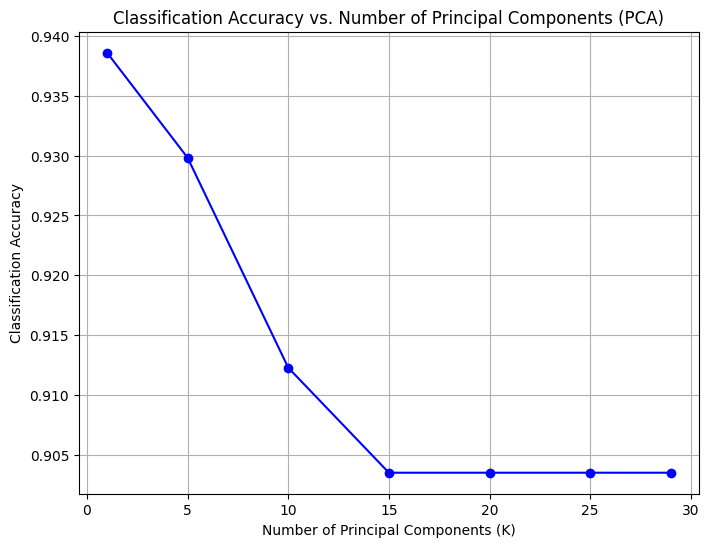

Accuracy = 0.9649122807017544
Precision = 0.9746835443037974
Recall = 0.9871794871794872
F1 Score = 0.980891719745223


In [ ]:
#problem 5
from sklearn.decomposition import PCA
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/cancer.csv'
cancerData = pd.read_csv(file_path)

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
target_col = 'diagnosis'

X = cancerData[feature_cols]
y = cancerData[target_col]

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=38)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 5, 10, 15, 20, 25, 29]
accuracy_values = []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    nb_pca = GaussianNB()
    nb_pca.fit(X_train_pca, y_train)

    accuracy_nb_pca = nb_pca.score(X_test_pca, y_test)
    accuracy_values.append(accuracy_nb_pca)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title("Classification Accuracy vs. Number of Principal Components (PCA)")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.show()

print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)